In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
cside_dir = '../../outputs/CSIDE_outputs/RCTD_results_9hr'

In [5]:
output = pd.read_csv(os.path.join(cside_dir, 'de_summary', 'all_2.csv'), index_col=0)

In [8]:
figure_output_folder =  'figs'

try:
    os.mkdir(figure_output_folder)
except:
    pass

7.55431711110993 44.5417598757825 FMO1
5.60246876275688 36.4539938550389 ALD1
8.00097431036205 33.5236913128768 BON3


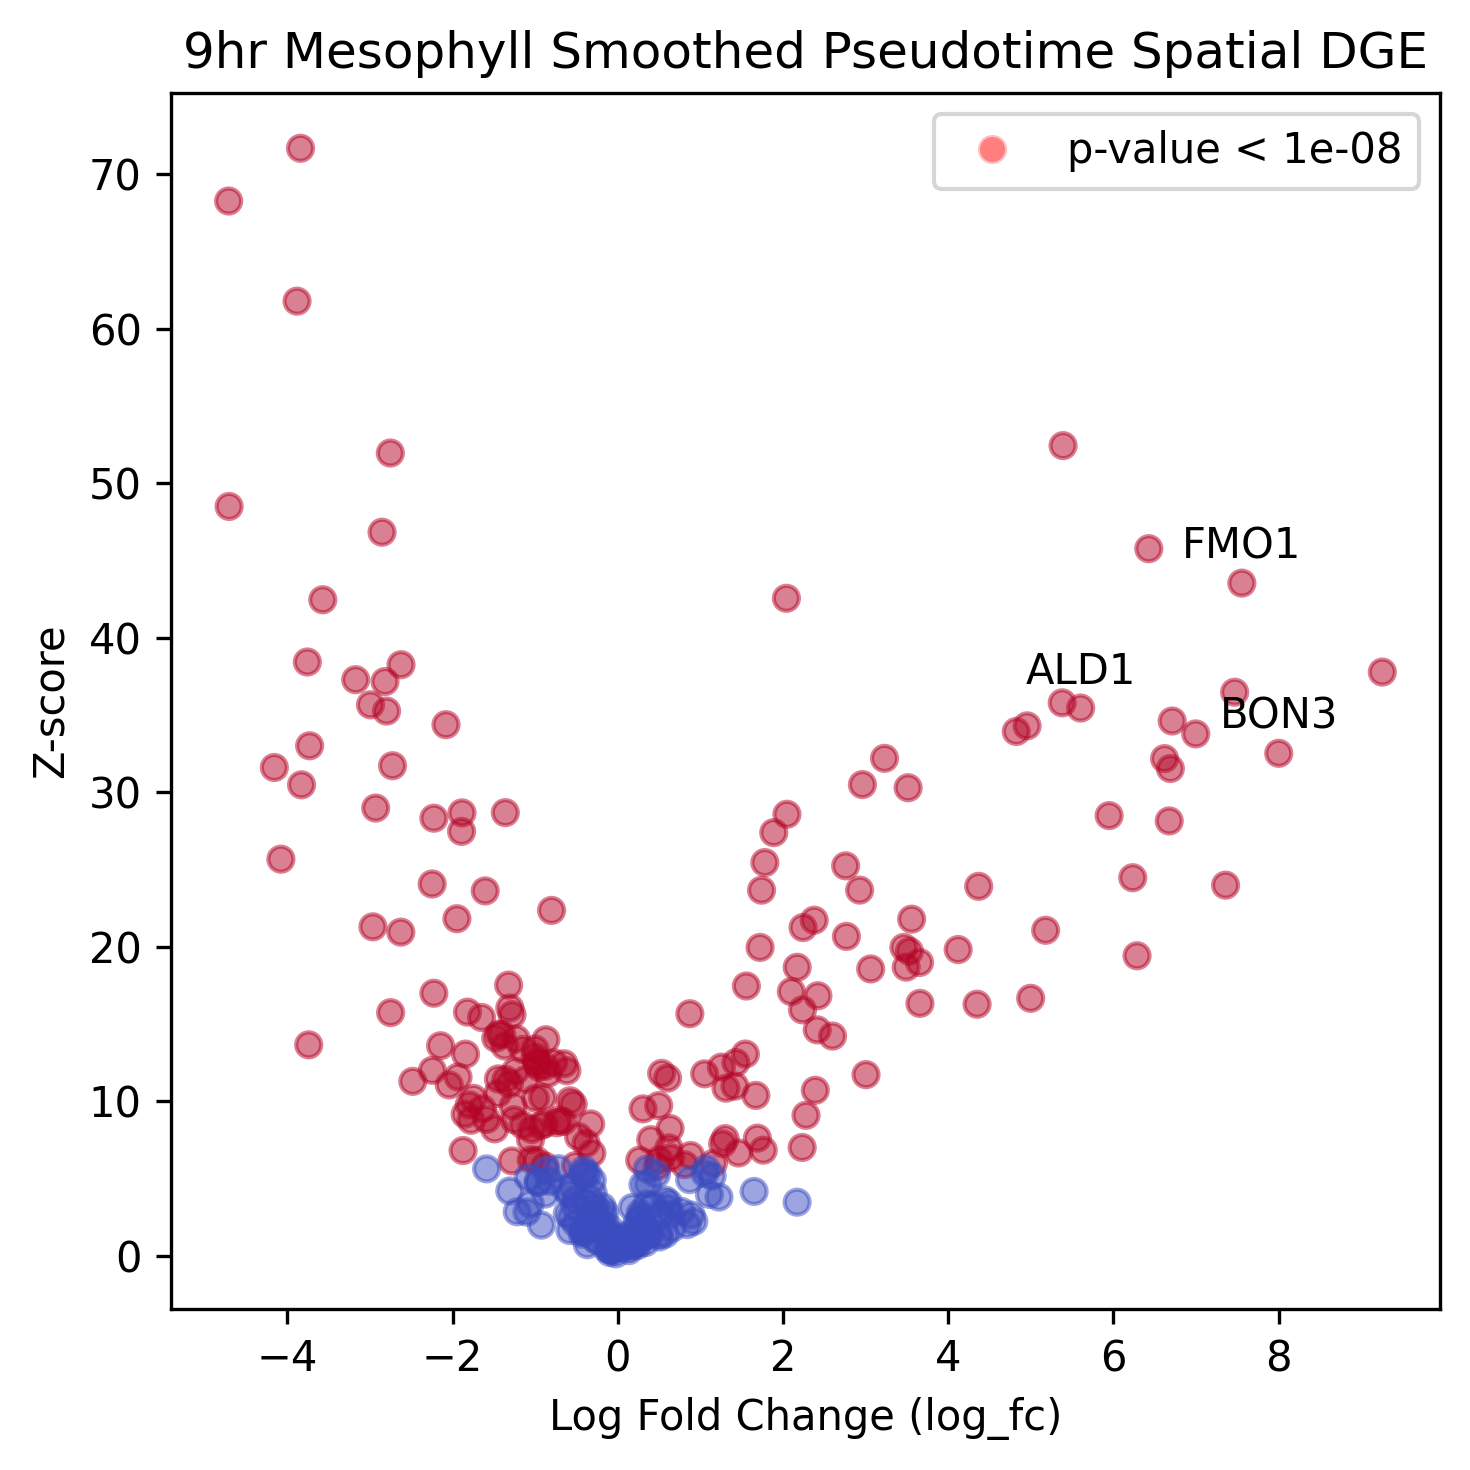

In [9]:
# Sort the DataFrame by p-value in ascending order
df_sorted = output.sort_values(by='p_val')

# Set a threshold for top points (you can adjust this threshold as needed)
top_threshold = 1e-8

# Create a boolean mask for top points
top_points_mask = df_sorted['p_val'] < top_threshold

# Create the volcano plot
plt.figure(figsize=(5, 5), dpi=300)
scatter = plt.scatter(df_sorted['log_fc'], df_sorted['Z_score'].values, c=top_points_mask, cmap='coolwarm', label=f'p < {top_threshold}', alpha=0.5)

# Label the top points by their index with an offset
top_threshold_ann = 1e-8
top_points_mask_ann = (df_sorted.index.isin(['BON3', 'FMO1', 'ALD1']) | (df_sorted['Z_score'] < top_threshold_ann))

for i, row in df_sorted[top_points_mask_ann].iterrows():
    # Offset the text annotation
    offset = 1  # Adjust as needed
    print(row['log_fc'], row['Z_score'] + offset, str(i))
    plt.text(row['log_fc'], row['Z_score'] + offset, str(i), fontsize=10, ha='center', va='bottom')

plt.xlabel('Log Fold Change (log_fc)')
plt.ylabel('Z-score')
plt.title('9hr Mesophyll Smoothed Pseudotime Spatial DGE')

# Customize the legend
legend_labels = [f'p-value < {top_threshold}']
scatter_for_legend = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0], markersize=7, markerfacecolor='red', alpha=0.5)
plt.legend(handles=[scatter_for_legend])

# plt.xlim(-9, 9)

plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(figure_output_folder, 'Mesophyll_Diff_Ex2.pdf'))
plt.show()